# SI 370 - Day 4: Univariate Statistics



# Overview of today 

- Announcements
- Comments/Questions/Concerns
- Today: Univariate Statistics 




# So, you want to explore your data...
* How can we describe it?
* What does it look like?
* What sorts of "preliminary checks" can we perform on our data? 
 * Why would we want to to this?

# Think about plotting the relationship between X and Y
![](resources/AnscombeData.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

# A nice linear relationship, right?
![](resources/AnscombeQ1.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

# Anscombe's Quartet
![](resources/AnscombePlot.png)
(https://en.wikipedia.org/wiki/Anscombe's_quartet)

# Why do we care?

* Statistical analysis requires good inputs
 * Remember Anscombe’s quartet
 * Which model should we use?
 * Tendencies/trends/patterns in data are important in picking the right models
* Anomalies are important to detect and understand




## Purpose of EDA (broadly)
* maximize insight into a data set
* uncover underlying structure
* extract important variables
* detect outliers and anomalies
* test underlying assumptions
* develop parsimonious models and
* determine optimal factor settings.

(National Institute of Standards and Technology)

## Our primary goal in this class: understand the _downstream_ statistical analyses enough so that we can make good decisions

# Spherical cows
The phrase comes from a joke that spoofs the simplifying assumptions that are sometimes used in theoretical physics.

>Milk production at a dairy farm was low, so the farmer wrote to the local university, asking for help from academia. A multidisciplinary team of professors was assembled, headed by a theoretical physicist, and two weeks of intensive on-site investigation took place. The scholars then returned to the university, notebooks crammed with data, where the task of writing the report was left to the team leader. Shortly thereafter the physicist returned to the farm, saying to the farmer, "I have the solution, but it works only in the case of spherical cows in a vacuum". [Wikipedia](https://en.wikipedia.org/wiki/Spherical_cow)

![Spherical cow](resources/Spot_the_cow.gif)




## The average weight of a Jersey cow is 1,000 lbs.
![](resources/jersey.jpg)

# Let's make some spherical cows...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# The weights of a herd of 80 cows
measures = (np.random.standard_normal(80)*150+1000).astype(int)
measures

array([1040, 1017,  697,  902,  923,  991,  705,  740, 1060,  975,  743,
        635, 1161, 1076,  957, 1207, 1041, 1397,  957,  821, 1115,  872,
       1113,  881,  749, 1168,  733,  763,  794,  963, 1061,  806,  998,
        938,  866, 1287, 1198,  780,  887,  804, 1159, 1107, 1026,  836,
       1087, 1055, 1064, 1313, 1169, 1032,  927, 1171,  867, 1086, 1144,
        854, 1135, 1075, 1081, 1359, 1003, 1007, 1167,  857, 1009, 1112,
        910, 1235,  947, 1187,  690, 1069,  930, 1063, 1118, 1167, 1042,
        895, 1080, 1006])

# <font color="magenta">BEGIN Q1: Create some "things" of your own
Think of some object and some property of that object.  I used cows and their weights.  Pick something that you know something about, and create a NumPy array of some number of them (ideally between 20 and 50000), recording some property.  So you might choose something like the height of undergraduate students, etc.  Pick somethink that will *likely* have a normal distribution (which is probably most things you can think of.</font>

First, pick the number that you want and assign it to numberOfObjects, then pick the mean value and assign it to meanOfProperty, and finally pick the variance and assign it to varianceOfProperty.  It doesn't matter what you pick, but if you're unsure pick 1/5 of the mean.

In [5]:
numberOfObjects = 20    # change 0 to some number between 20 and 50000
meanOfProperty = 8.5     # change 0 to the mean value of the property you're interested in
standardDeviationOfProperty = 2 # change 0 to the variance of the property -- try meanOfProperty/5 if you have no idea

Now create some data by asking for a random sample from a normal distribution, scaled so that it matches the mean and variance you want:

In [6]:
things = np.random.standard_normal(numberOfObjects)*standardDeviationOfProperty+meanOfProperty
# And let's say we want integers instead of floats:
things = things.astype(int)
things

array([ 7,  7,  9,  7,  6,  6, 11,  9,  6,  9, 11,  7, 10, 11,  8,  7,  9,
       13,  5,  8])

# <font color="magenta">END Q1</font>

## Measures of central tendency
* Mean
* Median 
* Mode

## Mean

Add up all the values and divide by the number of values:

$$mean = \frac {\sum{x_i}} {n}$$


In [7]:
sum(measures)/len(measures)

998.275

In [8]:
np.mean(measures) # find the mean

998.275

## Median

sort all the numbers and find the one in the middle

In [9]:
measures = np.sort(measures)
measures

array([ 635,  690,  697,  705,  733,  740,  743,  749,  763,  780,  794,
        804,  806,  821,  836,  854,  857,  866,  867,  872,  881,  887,
        895,  902,  910,  923,  927,  930,  938,  947,  957,  957,  963,
        975,  991,  998, 1003, 1006, 1007, 1009, 1017, 1026, 1032, 1040,
       1041, 1042, 1055, 1060, 1061, 1063, 1064, 1069, 1075, 1076, 1080,
       1081, 1086, 1087, 1107, 1112, 1113, 1115, 1118, 1135, 1144, 1159,
       1161, 1167, 1167, 1168, 1169, 1171, 1187, 1198, 1207, 1235, 1287,
       1313, 1359, 1397])

In [10]:
measures[len(measures)//2]  # find middle value

1017

In [11]:
np.median(measures)

1013.0

## Another alternative: Mode

* mode = most common value
* Unfortunately not in default numpy


In [12]:

from scipy import stats
stats.mode(measures)

ModeResult(mode=array([957]), count=array([2]))

# <font color="magenta">BEGIN Q2: Calculate the mean, median and mode of your "things"

Step 1: Just run the following cell (assumes you have some data in an np array called "things")

In [13]:
from scipy import stats # just in case we didn't already do it

thingsMean = np.mean(things)
thingsMedian = np.median(things)
thingsMode = stats.mode(things)

print(thingsMean, thingsMedian, thingsMode)

8.3 8.0 ModeResult(mode=array([7]), count=array([5]))


Step 2: Now, to demonstrate what happens to mean, median and mode when you add an outlier, append some crazy big value to the end of your things.  But let's not mess up our things array, so let's copy it first

In [14]:
things2 = things.copy()
things2 = np.append(things2,[100000])
things2Mean = np.mean(things2)
things2Median = np.median(things2)
things2Mode = stats.mode(things2)

print(things2Mean, things2Median, things2Mode)

4769.809523809524 8.0 ModeResult(mode=array([7]), count=array([5]))


Step 3: Record, in your own words, what happened to each of the mean, median and mode when you added that value:

<font color="red">When I added that number, the mean went insane, but both the median and the mode stayed the same. It seems like the mean is effected by outliers, while the median and mode are not (at least in this case).</font>

# <font color="magenta">END Q2</font>

## Measures of dispersion

* Percentile cutoffs
 * Interpercentile range
* Variance
* Standard Deviation

## Percentiles

* In a *sorted* list, find the threshold so that data is split
 * 5th percentile -- bottom 5% of measures below threshold
 * 25th percentile -- bottom 25% of measures below
 * 97th percentile -- bottom 97% of mesures below

the median is the 50th percentile

## Numpy does this well

`np.percentile(array,percentile,
               interpolation='linear')`

* linear: i + (j - i) 
* fraction, where fraction is the fractional part of the index surrounded by i and j.
* lower: i.
* higher: j.
* nearest: i or j, whichever is nearest.
* midpoint: (i + j) / 2.


In [15]:
np.percentile(measures,25) # the 25th percentile

878.75

In [16]:
np.percentile(measures,25,interpolation='higher') # bump it up to the next higher real value from the data

881

## Interpercentile Range

* Sometimes we want to some range
 * e.g., 5th -- 95th percentile
 * clearly, 90% of measures sit here

In [17]:
print(np.percentile(measures,5),"-",np.percentile(measures,95))

731.6 - 1237.5999999999997


## Variance

How does the data spread around the mean?

$$ variance = \frac{\sum{(x_i - \mu)^2}}{n}$$

where, $\mu$ is the mean

$$ mu = \frac{\sum{x_i}}{n}$$

square it to make sure it doesn't go to zero, and then also to over-represent thet differences from the mean

## Standard Deviation

* Measure of dispersion 

![standard deviation](resources/Standard_deviation_diagram.svg.png)
(https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/640px-Standard_deviation_diagram.svg.png "sd")

In [18]:
print(np.percentile(measures,5),"-",np.percentile(measures,95))
print(np.var(measures))
print(np.std(measures))  # this should be the square root of variance

731.6 - 1237.5999999999997
26756.949375000004
163.57551581761862


# <font color="magenta">BEGIN Q3: Measures of dispersion</font>
Run the following cell.  Does the output for standard deviation match what you asked for when you first generated the data in Q1? What's the relationship between the 5th-to-95th percentile range and the standard deviation? Answer below

In [19]:
print(np.percentile(things,2.5),"-",np.percentile(things,97.5))
print(np.var(things))
print(np.std(things))  # this should be the square root of variance

5.475 - 12.049999999999997
4.21
2.0518284528683193


I set the std up top to be 2, and here is is super close to 2, so I'd say it worked pretty well. The relationship between the 5th to 95th percentile range and the standard deviation isn't great, the range is a little larger than 8 + or - 2, but it's not too far off.

# <font color="magenta">END Q3</font>

# Visualizing data with Seaborn
* Visualization package built on top of matplotlib
* It's meant to make your life better
* Plays well with pandas, numpy, scipy, and statsmodels
* Many different visualization are included:
 * Strip plots, Swarm plots, Violin plots
 * Box plots
 * Histograms
 
 We need to import the package, and it's typically imported as sns:
 
 ```
 import seaborn as sns
 ``` 
 
 and don't forget to inline matplotlib (that's a jupyter thing):

 ```
 %matplotlib inline
 ```

[seaborn.pydata.org](http://seaborn.pydata.org)

In [20]:
import seaborn as sns

## Strip Plot

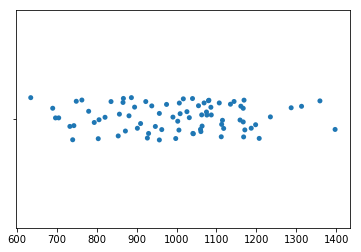

In [21]:
%matplotlib inline
import seaborn as sns  # you might need to do: conda install seaborn
sns.stripplot(x=measures)

## Swarm Plot

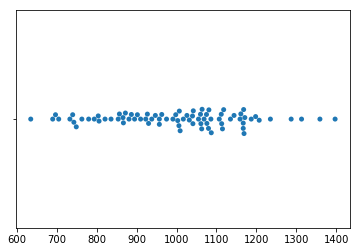

In [22]:
sns.swarmplot(x=measures)

## Violin Plot
* If we have too much data

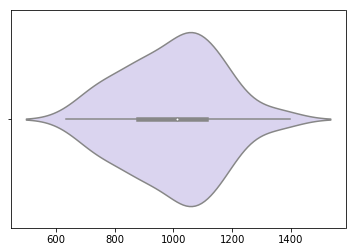

In [23]:
sns.violinplot(x=measures,color="#d7d0f3")

## Box Plot

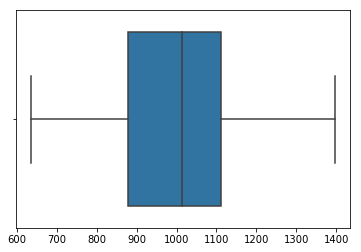

In [24]:
sns.boxplot(x=measures) 

Here's a quick explanation of what a box and whisker plot means:
![Boxplot](resources/boxplot.png)

## Histogram

We're going to use this a lot.  Seaborn puts a nice smooth line over a distribution.  We'll talk about that soon, but for now just think about it as an extrapolation:  if we had a bunch more data, the distribution would eventually smooth out to something that looks like the line.

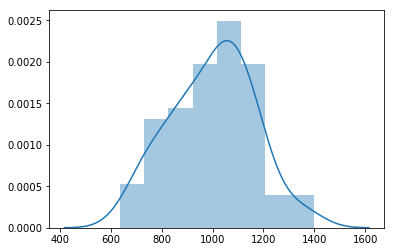

In [25]:
# x axis = value, y axis = count (frequency)
sns.distplot(measures); 

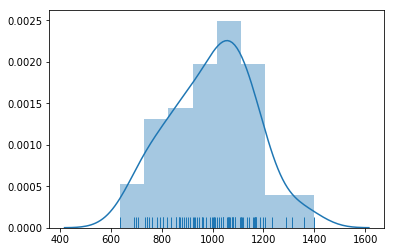

In [26]:
sns.distplot(measures, rug=True); # show a strip plot on bottom -- we call it a "rug"

# <font color="magenta">BEGIN Q4: Test driving Seaborn</font>
Your turn:  run the following cells on your data to generate the plots described above.  

In [27]:
%matplotlib inline

import seaborn as sns  # you might need to do: conda install seaborn
import matplotlib.pyplot as plt


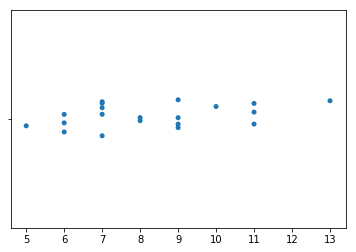

In [28]:
sns.stripplot(x=things)

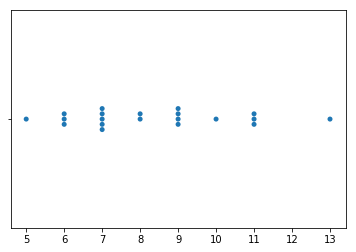

In [29]:
sns.swarmplot(x=things)

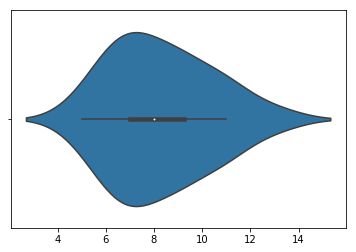

In [30]:
sns.violinplot(x=things)

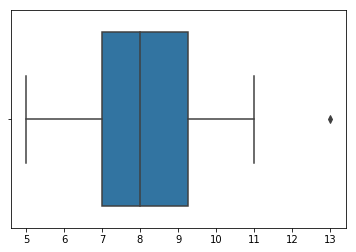

In [31]:
sns.boxplot(x=things)

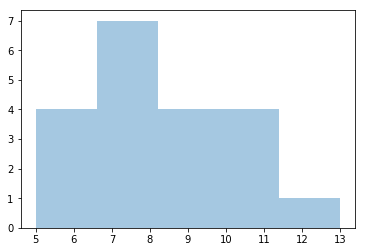

In [32]:
sns.distplot(things,kde=False)

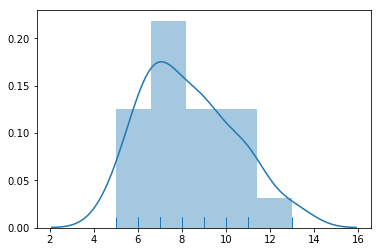

In [34]:
sns.distplot(things,rug=True)

# <font color="magenta">END  Q4</font>

## Why do we care about distributions?
## World is not normal
* Many other kinds of distributions
* We can tell what they are by looking at distribution

## Uniform

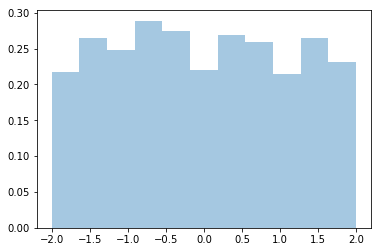

In [35]:
uniform = np.random.uniform(-2,2,1000)  # low,high,count
sns.distplot(uniform,kde=False,norm_hist=True)

## Bimodal

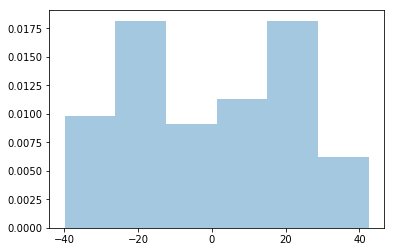

In [36]:
bimodal = np.append(np.random.normal(-20,10,100),
                    np.random.normal(20,10,100))
sns.distplot(bimodal,kde=False,norm_hist=True)

# Poisson

$$ P(k~events~in~interval) = \frac{\lambda^ke^{-\lambda}}{k!} $$

$\lambda$ is the event rate

Examples
* Meteor strikes
* Arrival of patients to hospital

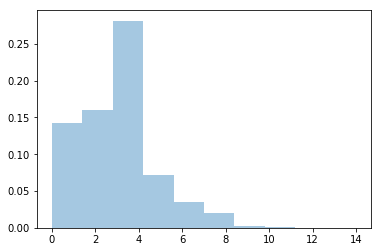

In [37]:
# as lambda goes up --> looks more normal
pois = np.random.poisson(3,100000) # lambda, count 
sns.distplot(pois,kde=False,bins=10,norm_hist=True)

# Power/Zipf/Pareto

$$ P = \frac{x^{-a}}{\zeta(a)}$$

"long tail"
* degree distribution
* movie/music popularity
* words

## Note:  both axes are log-transformed

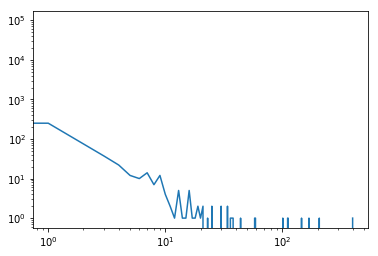

In [39]:
# bit of a hack (seaborn)
power = np.random.zipf(2,100000)
ax = plt.plot(np.histogram(power,bins=400)[0])
ax[0].axes.set_xscale("log")
ax[0].axes.set_yscale("log")

## Visual Tests on Data

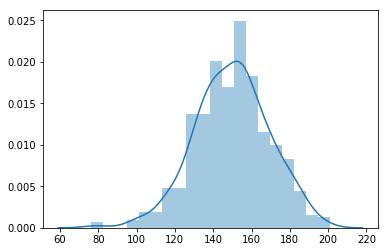

In [40]:
testdata = (np.random.standard_normal(500)*20+150).astype(int)
sns.distplot(testdata)

## Run Sequence
* Run Sequence (index versus value)
* flat and non-drifting
 * fixed-location assumption holds
* vertical spread same over the entire plot, 
 * then the fixed-variation assumption holds.

Text(0.5, 0, 'i')

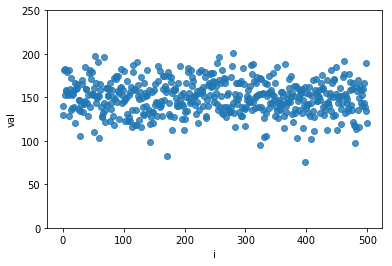

In [41]:
ax = sns.regplot(np.arange(len(testdata)),testdata,fit_reg=False)
ax.set_ylim(0,250)
ax.set_ylabel("val")
ax.set_xlabel("i")

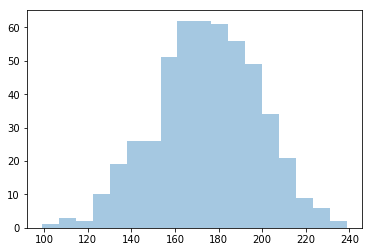

In [42]:
drifting = np.array([testdata[i]+i*(.1) for i in np.arange(len(testdata))])
sns.distplot(drifting,kde=False)

Text(0.5, 0, 'i')

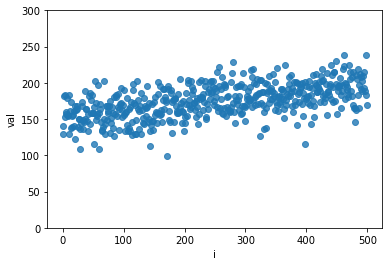

In [43]:
ax = sns.regplot(np.arange(len(drifting)),drifting,fit_reg=False)
ax.set_ylim(0,300)
ax.set_ylabel("val")
ax.set_xlabel("i")

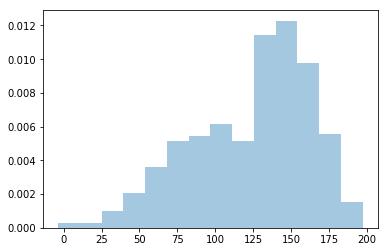

In [44]:
expanding = np.array([(testdata[i]+i*np.random.randint(-1,1)*.2)
                     for i in np.arange(len(testdata))])
sns.distplot(expanding,kde=False,norm_hist=True)

Text(0.5, 0, 'i')

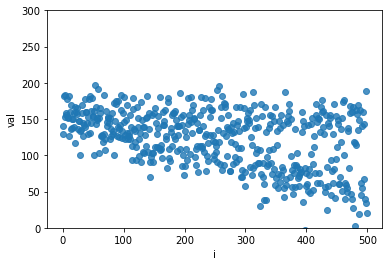

In [45]:
ax = sns.regplot(np.arange(len(expanding)),expanding,fit_reg=False)
ax.set_ylim(0,300)
ax.set_ylabel("val")
ax.set_xlabel("i")

# Lag Plot

* Plot point $y_i$ versus $y_{i-1}$
* If the lag plot is structureless
 * randomness assumption holds.

Text(0.5, 0, 'y_i')

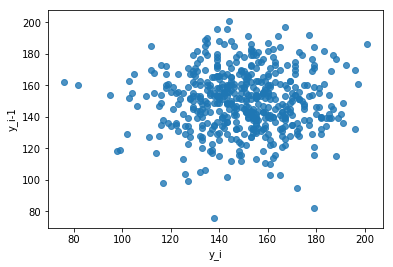

In [46]:
lag = testdata.copy()
lag = np.array(lag[:-1])
current = testdata[1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

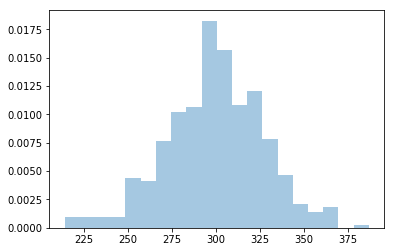

In [47]:
connected = np.array([testdata[i]+testdata[i-1] for i in np.arange(500)])
sns.distplot(connected,kde=False,norm_hist=True)

Text(0.5, 0, 'y_i')

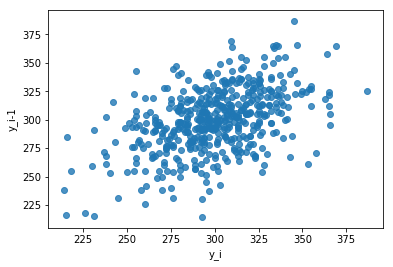

In [48]:
lag = connected.copy()
lag = np.array(lag[:-1])
current = connected[1:]
ax = sns.regplot(current,lag,fit_reg=False)
ax.set_ylabel("y_i-1")
ax.set_xlabel("y_i")

## QQ Plot
* QQ Plots takes our n ordered data points
 * sorted from smallest to largest
* Asks:
 * What is the relationship between quantiles from our data and quantiles from a theoretical distribution that we're assuming the sample is drawn from

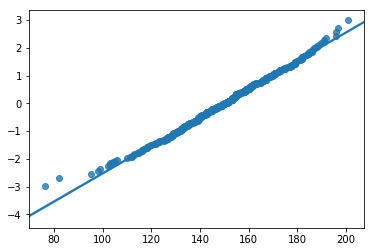

In [49]:
qntls, xr = stats.probplot(testdata, fit=False)
sns.regplot(xr,qntls)

In [50]:
def random_snorm(n, mean = 0, sd = 1, xi = 1.5):
    def random_snorm_aux(n, xi):
        weight = xi/(xi + 1/xi)
        z = np.random.uniform(-weight,1-weight,n)
        xi_ = xi**np.sign(z)
        random = -np.absolute(np.random.normal(0,1,n))/xi_ * np.sign(z)
        m1 = 2/np.sqrt(2 * np.pi)
        mu = m1 * (xi - 1/xi)
        sigma = np.sqrt((1 - m1**2) * (xi**2 + 1/xi**2) + 2 * m1**2 - 1)
        return (random - mu)/sigma

    return random_snorm_aux(n, xi) * sd + mean


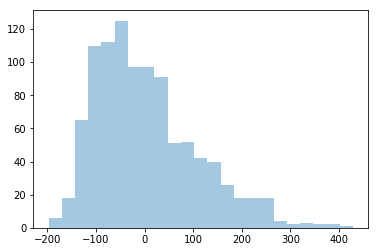

In [51]:
rightskewed = random_snorm(1000,xi=2)*100
sns.distplot(rightskewed,kde=False)

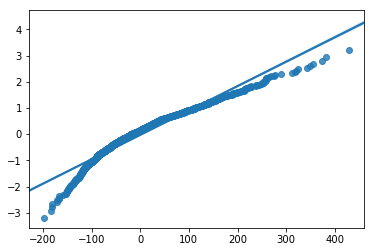

In [52]:
qntls, xr = stats.probplot(rightskewed, fit=False)
sns.regplot(xr,qntls)

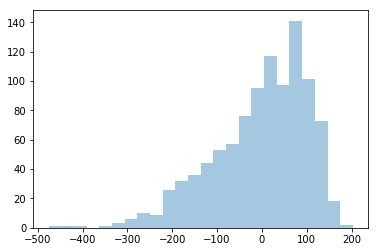

In [53]:
leftskewed = random_snorm(1000,xi=-2)*100
sns.distplot(leftskewed,kde=False)

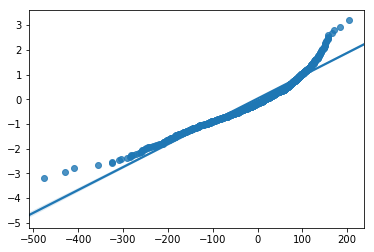

In [54]:
qntls, xr = stats.probplot(leftskewed, fit=False)
sns.regplot(xr,qntls)

## Now the serious plots... let's wrap them in a single function that we can call

In [55]:
def multiplePlots( series ):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.distplot(series, ax=axs[0,0])
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr,qntls, ax=axs[1,0])
    
    # Run sequence
    ax = sns.regplot(np.arange(len(series)),series, ax=axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")


## Now run this on your "things"

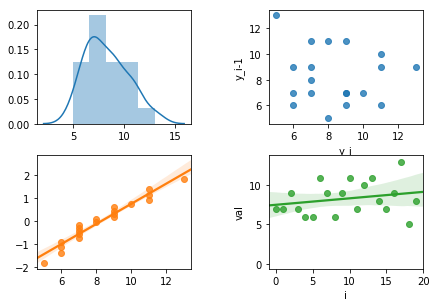

In [56]:
multiplePlots(things)

Assuming you used a random normal distribution to generate your "things", you should see evidence that you things are, indeed, normally distributed.

## <font color="magenta">Q5: Figuring out distributions</font>

The file ```data/sample.csv``` contains 9 variables (v0...v8), each of which is drawn from a different distribution.  Try to figure out the distribution for each variable. You might want to start by using the ```multiplePlots()``` function we defined earlier.

In [57]:
distributions = pd.read_csv('data/sample.csv')
distributions.columns

Index(['Unnamed: 0', 'v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8'], dtype='object')

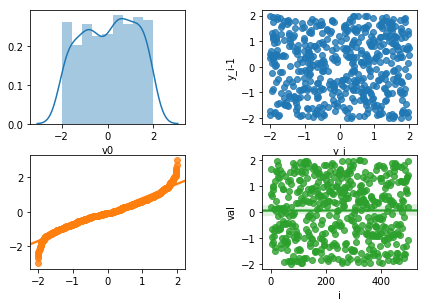

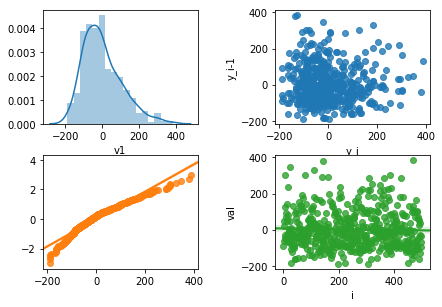

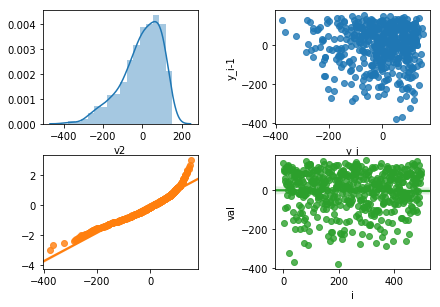

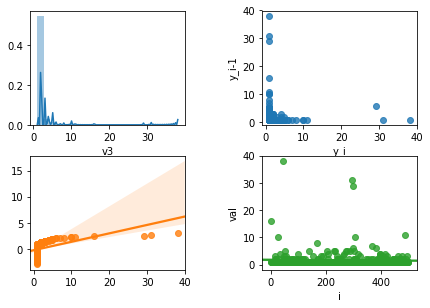

In [63]:
# Insert your code here
multiplePlots(distributions['v0'])
multiplePlots(distributions['v1'])
multiplePlots(distributions['v2'])
multiplePlots(distributions['v3'])

v0: uniform, 
v1: skewed right, 
v2: skewed left, 
v3: skewed right

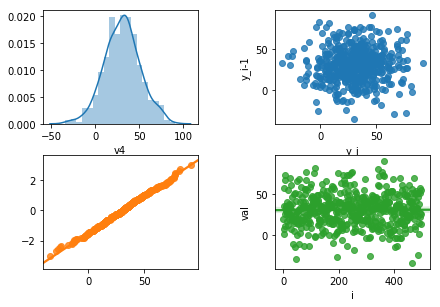

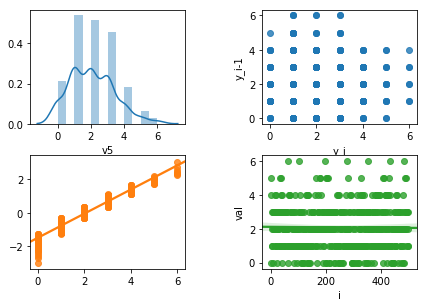

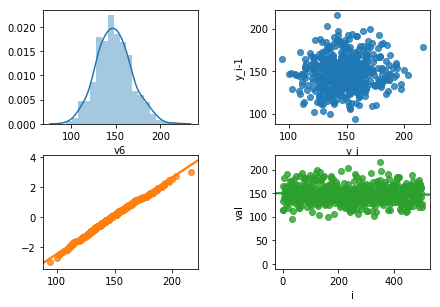

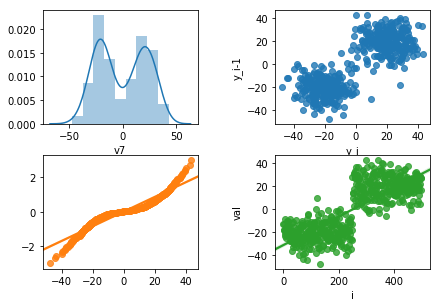

In [64]:
multiplePlots(distributions['v4'])
multiplePlots(distributions['v5'])
multiplePlots(distributions['v6'])
multiplePlots(distributions['v7'])

v4: normal, 
v5: ??, 
v6: normal, 
v7: bimodal

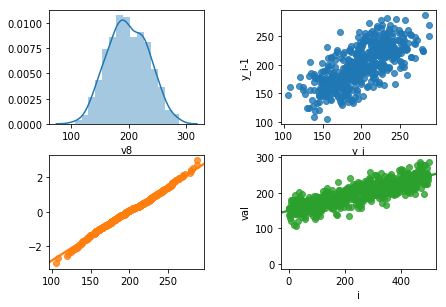

In [67]:
multiplePlots(distributions['v8'])

v8: normal

# <font color="magenta">END Q5</font>

## REMEMBER TO SUBMIT THIS NOTEBOOK TO CANVAS IN HTML FORMAT

KTOPS